### A/B test about pizza delivery. Our service has troubles with delivery boys and developers thought of new algorithm of their route. It is necessary to get it will be relevant idea or not.

#### Have a look on the data and split our ID into two groups:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from scipy import stats

In [2]:
df = pd.read_csv('../Lesson_4/experiment_lesson_4.csv')
df.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


In [68]:
df.experiment_group.value_counts()

test       10104
control    10092
Name: experiment_group, dtype: int64

In [4]:
df.dtypes

order_id              int64
delivery_time       float64
district             object
experiment_group     object
dtype: object

In [5]:
df.isna().sum()

order_id            0
delivery_time       0
district            0
experiment_group    0
dtype: int64

In [8]:
df.describe()

,order_id,delivery_time
count,20196.000000,20196.000000
mean,11103.503565,42.054169
std,5835.424404,10.382196
min,1000.000000,10.000000
25%,6048.750000,35.000000
50%,11109.500000,42.000000
75%,16158.250000,49.000000
max,21207.000000,83.000000


district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

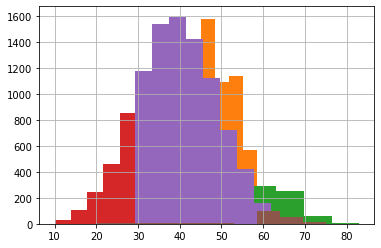

In [15]:
df.query('experiment_group == "control"').groupby('district').delivery_time.hist()
df.query('experiment_group == "test"').groupby('district').delivery_time.hist()

In [24]:
abs(df[df['experiment_group'] == 'control'].shape[0] - df[df['experiment_group'] == 'test'].shape[0])

12

#### Null hypothesis: time of delivery doesn't differ from previous one. 
#### Alternative one: time of delivery differs from previous one. 

#### Check normality of distributions of control and test samples

In [26]:
test_sample = df[df['experiment_group'] == 'test']['delivery_time'].sample(1000, random_state=17)

In [27]:
stats.shapiro(test_sample)

ShapiroResult(statistic=0.9975479245185852, pvalue=0.14013493061065674)

In [40]:
control_sample = df[df['experiment_group'] == 'control']['delivery_time'].sample(1000, random_state=17)

In [41]:
stats.shapiro(control_sample)

ShapiroResult(statistic=0.9974725842475891, pvalue=0.12411931157112122)

#### Shapiro-Wilk test gets that distributions are normal

In [46]:
df[df['experiment_group'] == 'control'].delivery_time.std().round(2)

9.99

In [45]:
df[df['experiment_group'] == 'test'].delivery_time.std().round(2)

9.88

#### Use T-test for independent samples with normal distribution.

In [48]:
stats.ttest_ind(df[df['experiment_group'] == 'test'].delivery_time, df[df['experiment_group'] == 'control'].delivery_time)

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

#### We got statistically significant outcome, our new algorithm works. 
#### What percent the average delivery time has changed?

In [58]:
test_mean = df[df['experiment_group'] == 'test'].delivery_time.mean()

In [59]:
control_mean = df[df['experiment_group'] == 'control'].delivery_time.mean()

In [65]:
(100 - 100 * test_mean/control_mean).round(2)

13.35

#### We are fairly confident that it is worth to deploy new route algorithm on all app users.